<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Graphique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load data from other file**


In [34]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [35]:
# Clone the repository to get the latest version of the data files
!rm -rf Project_NBA_GroupM

!git clone https://github.com/maadmaaax/Project_NBA_GroupM.git

# Convert Analyse_Principale.ipynb to a Python script and overwrite if it exists
!jupyter nbconvert --to python Project_NBA_GroupM/Analyse_Principale.ipynb


!sed -i 's/^import pandas as pd/import pandas as pd\nimport statsmodels.api as sm_stats/' Project_NBA_GroupM/Analyse_Principale.py
!sed -i 's/sm.add_constant/sm_stats.add_constant/g' Project_NBA_GroupM/Analyse_Principale.py

from Project_NBA_GroupM.Analyse_Principale import nbas_data_full, sts_data_full


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabulate as tbl
import seaborn as sns

Cloning into 'Project_NBA_GroupM'...
remote: Enumerating objects: 805, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 805 (delta 260), reused 225 (delta 225), pack-reused 526 (from 2)
Receiving objects: 100% (805/805), 19.89 MiB | 18.25 MiB/s, done.
Resolving deltas: 100% (358/358), done.
[NbConvertApp] Converting notebook Project_NBA_GroupM/Analyse_Principale.ipynb to python
[NbConvertApp] Writing 41359 bytes to Project_NBA_GroupM/Analyse_Principale.py


In [36]:

nbas_df = nbas_data_full
sts_df  = sts_data_full



 ## **Are 3-pointers more efficient than other field goals ?**


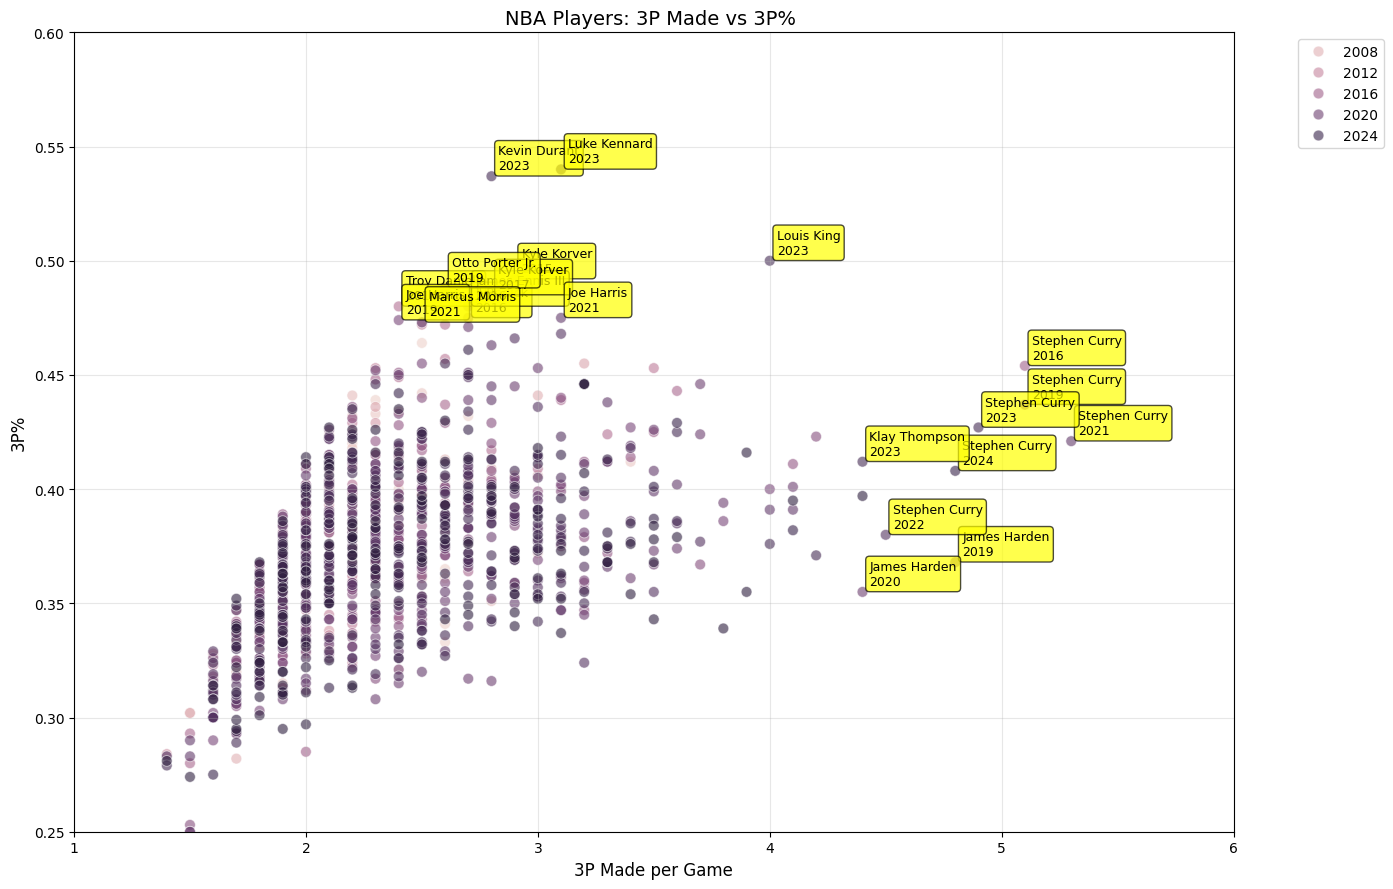

We can see that there's 2 type of outlier, the first category we will call selective
shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.
The second category are the volume shooter they still have above average accuracy
35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry


In [37]:
#3P made vs 3P% by players. This graph allow us to see the tradeoff between accurary 3P% and volume 3P made


df = nbas_data_full

#Keeping only player who attempted more than 5 3P to filter noise created by player who doesn't shoot often
relevant = nbas_data_full[nbas_data_full['3PA'] >= 5.0]



# Define outliers: top 10 by 3P made OR extreme 3P% within range
outliers = pd.concat([
    relevant.nlargest(10, '3P'), #Top 10 most productive (3P)
    relevant[relevant['3P%'] >= relevant['3P%'].quantile(0.99)],  # Top 1% most accurate (3P%)
]).drop_duplicates()

# Create the scatter plot
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(data=relevant, x='3P', y='3P%', hue='Season', alpha=0.6, s=60)

# Add outlier labels
for idx, row in outliers.iterrows():
    plt.annotate(f"{row['Player']}\n{int(row['Season'])}",
                xy=(row['3P'], row['3P%']),
                xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, ha='left')

plt.xlabel('3P Made per Game', fontsize=12)
plt.ylabel('3P%', fontsize=12)
plt.title('NBA Players: 3P Made vs 3P% ', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0.25, 0.60)  # Lock y-axis to only display the relevant range
plt.xlim(1, 6)
plt.tight_layout()
plt.show()



print("We can see that there's 2 type of outlier, the first category we will call selective")
print("shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.")
print("The second category are the volume shooter they still have above average accuracy")
print( "35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry")

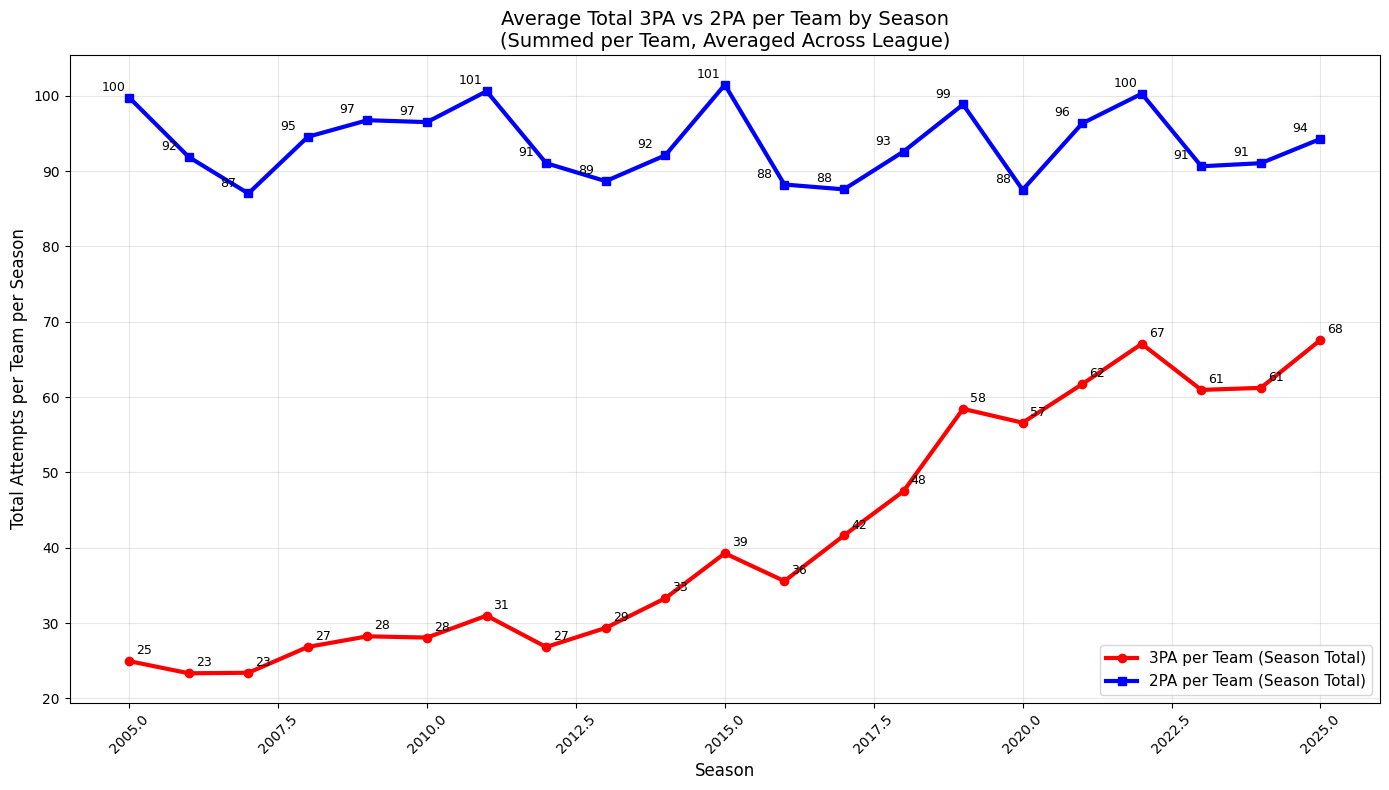


3PA Growth: 68 in 2025 (+171% from 2005)

2PA Growth: 94 in 2025 (6% from 2005)


In [38]:
#Evolution of shot attempt by team,  This is to see if there's any trend on the kind of shot that team take
# Group by Season and Team, sum attempts per team, then average across teams per season
team_attempts = df.groupby(['Season', 'Team'])[['3PA', '2PA']].sum().reset_index()
season_team_avg = team_attempts.groupby('Season')[['3PA', '2PA']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')



# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3PA'],
         marker='o', linewidth=3, label='3PA per Team (Season Total)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2PA'],
         marker='s', linewidth=3, label='2PA per Team (Season Total)', color='blue')


plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Attempts per Team per Season', fontsize=12)
plt.title('Average Total 3PA vs 2PA per Team by Season\n(Summed per Team, Averaged Across League)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels
for i in range(-21, 0):
    plt.annotate(f'{season_team_avg["3PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3PA'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2PA'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print growth stat to be used in report

print(f"\n3PA Growth: {season_team_avg['3PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"(+{((season_team_avg['3PA'].iloc[-1]/season_team_avg['3PA'].iloc[0]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")
print(f"\n2PA Growth: {season_team_avg['2PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"({((season_team_avg['2PA'].iloc[0]/season_team_avg['2PA'].iloc[-1]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")


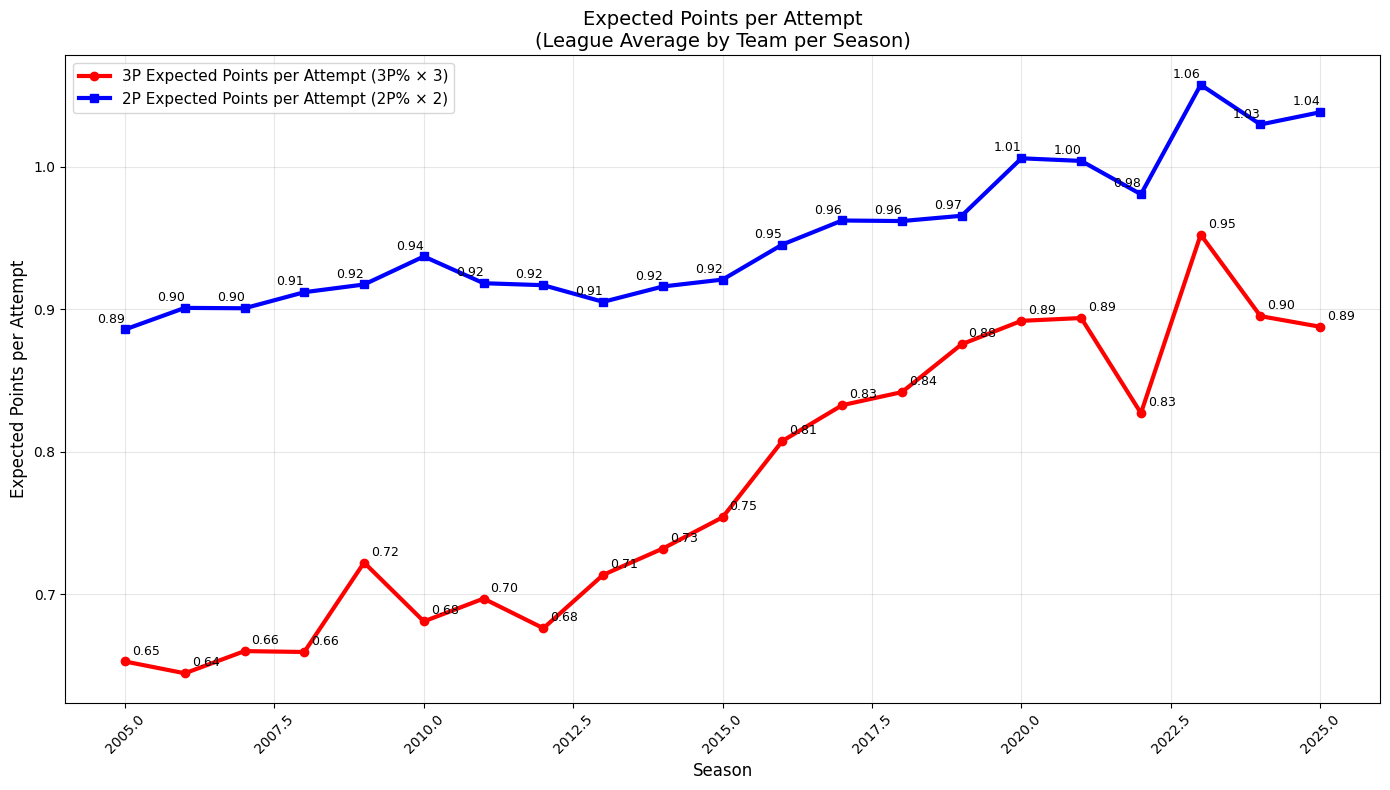

Expected Points per Attempt by Season (Avg across teams):
    Season  2P_exp_per_attempt  3P_exp_per_attempt
0     2005               0.886               0.653
1     2006               0.901               0.644
2     2007               0.901               0.660
3     2008               0.912               0.659
4     2009               0.917               0.722
5     2010               0.937               0.681
6     2011               0.918               0.697
7     2012               0.917               0.676
8     2013               0.905               0.713
9     2014               0.916               0.732
10    2015               0.921               0.754
11    2016               0.945               0.807
12    2017               0.962               0.833
13    2018               0.962               0.842
14    2019               0.966               0.875
15    2020               1.006               0.892
16    2021               1.004               0.894
17    2022              

In [39]:
#Expected point over the season by team, really mathematical value of each type of shot
# Group by Season and Team, calculate expected points per attempt, then average across teams per season
team_stats = df.groupby(['Season', 'Team']).agg({
    '2P%': 'mean',
    '3P%': 'mean'
}).reset_index()

# Calculate expected points PER ATTEMPT for each shot type per team; multiplying shot value 2 or 3 by it accuracy
team_stats['2P_exp_per_attempt'] = team_stats['2P%'] * 2
team_stats['3P_exp_per_attempt'] = team_stats['3P%'] * 3

# Average across teams per season
season_team_avg = team_stats.groupby('Season')[['2P_exp_per_attempt', '3P_exp_per_attempt']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')
season_team_avg = season_team_avg[season_team_avg['3P_exp_per_attempt'] > 0].sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3P_exp_per_attempt'],
         marker='o', linewidth=3, label='3P Expected Points per Attempt (3P% × 3)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2P_exp_per_attempt'],
         marker='s', linewidth=3, label='2P Expected Points per Attempt (2P% × 2)', color='blue')


plt.xlabel('Season', fontsize=12)
plt.ylabel('Expected Points per Attempt', fontsize=12)
plt.title('Expected Points per Attempt\n(League Average by Team per Season)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels
for i in range(-21, 0):
    plt.annotate(f'{season_team_avg["3P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3P_exp_per_attempt'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2P_exp_per_attempt'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("Expected Points per Attempt by Season (Avg across teams):")
print(season_team_avg[['Season', '2P_exp_per_attempt', '3P_exp_per_attempt']].round(3))
print(f"\nRecent season ({season_team_avg['Season'].iloc[-1]}):")
print(f"2P: {season_team_avg['2P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P: {season_team_avg['3P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P efficiency: {season_team_avg['3P_exp_per_attempt'].iloc[-1]/season_team_avg['2P_exp_per_attempt'].iloc[-1]:.2f}x 2P efficiency")

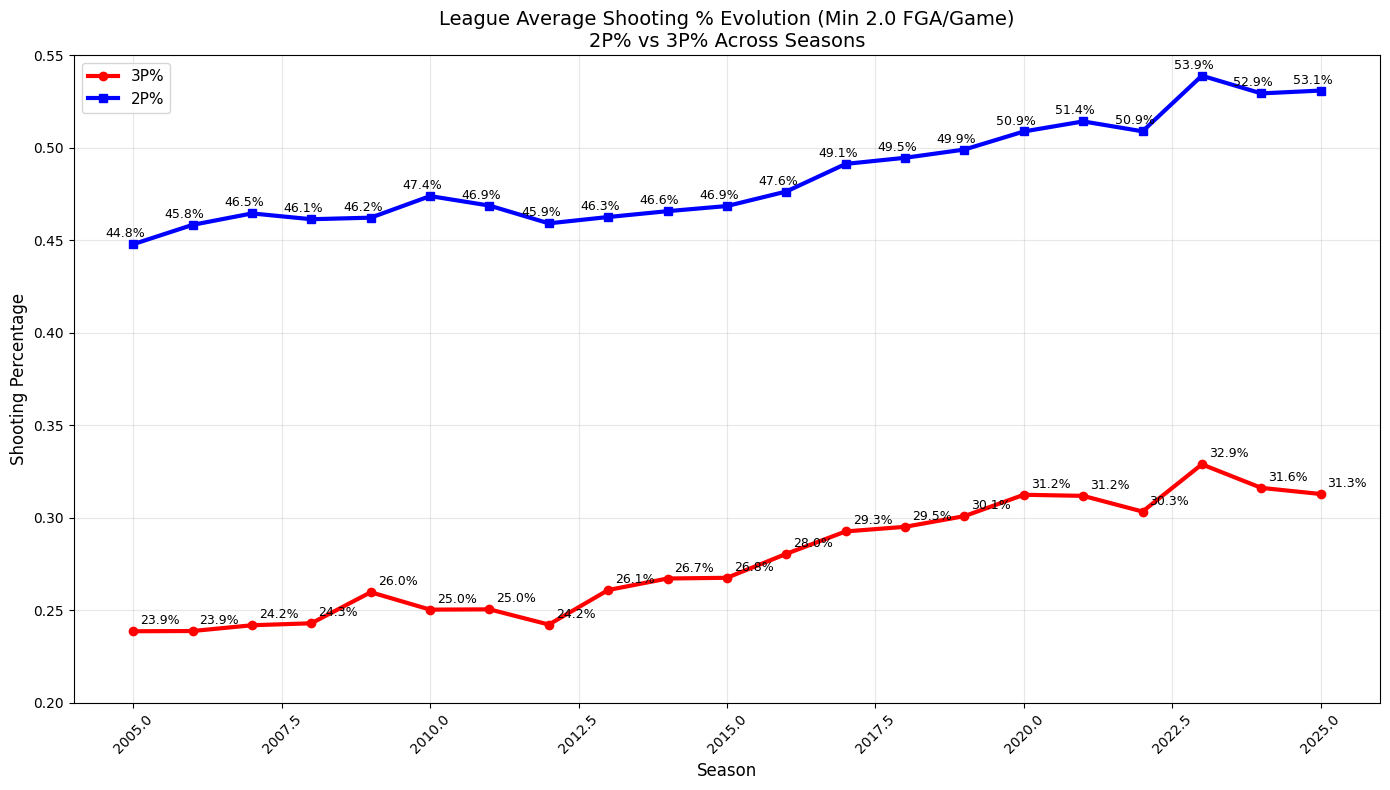

current league average 2P%: 53.1%
current league average 3P%: 31.3%
3P% improvement since 2005: +7.4 percentage points
2P% improvement since 2005: +8.3 percentage points


In [40]:
#Evolution of accuracy 2P% and 3P% by teaam, is the trend of shot selection linked to an increase in effeciency?
#Filter out player who take less than 2 shot to reduce noise.
df_filtered = df[df['FGA'] >= 2.0].copy()

# Group by Season, calculate league average shooting percentages across qualified players
season_shooting = df_filtered.groupby('Season')[['2P%', '3P%']].mean().reset_index()
season_shooting['Season'] = pd.to_numeric(season_shooting['Season'], errors='coerce')
season_shooting = season_shooting.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_shooting['Season'], season_shooting['3P%'],
         marker='o', linewidth=3, label='3P%', color='red')
plt.plot(season_shooting['Season'], season_shooting['2P%'],
         marker='s', linewidth=3, label='2P%', color='blue')

plt.xlabel('Season', fontsize=12)
plt.ylabel('Shooting Percentage', fontsize=12)
plt.title('League Average Shooting % Evolution (Min 2.0 FGA/Game)\n2P% vs 3P% Across Seasons', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ylim(0.20, 0.55)  # Focus on relevant range

# Add value labels on recent seasons
for i in range(-21, 0):
    plt.annotate(f'{season_shooting["3P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['3P%'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_shooting["2P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['2P%'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats

print("current league average "f"2P%: {season_shooting['2P%'].iloc[-1]:.1%}")
print("current league average "f"3P%: {season_shooting['3P%'].iloc[-1]:.1%}")

print(f"3P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['3P%'].iloc[-1]-season_shooting['3P%'].iloc[0])*100:.1f} percentage points")
print(f"2P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['2P%'].iloc[-1]-season_shooting['2P%'].iloc[0])*100:.1f} percentage points")

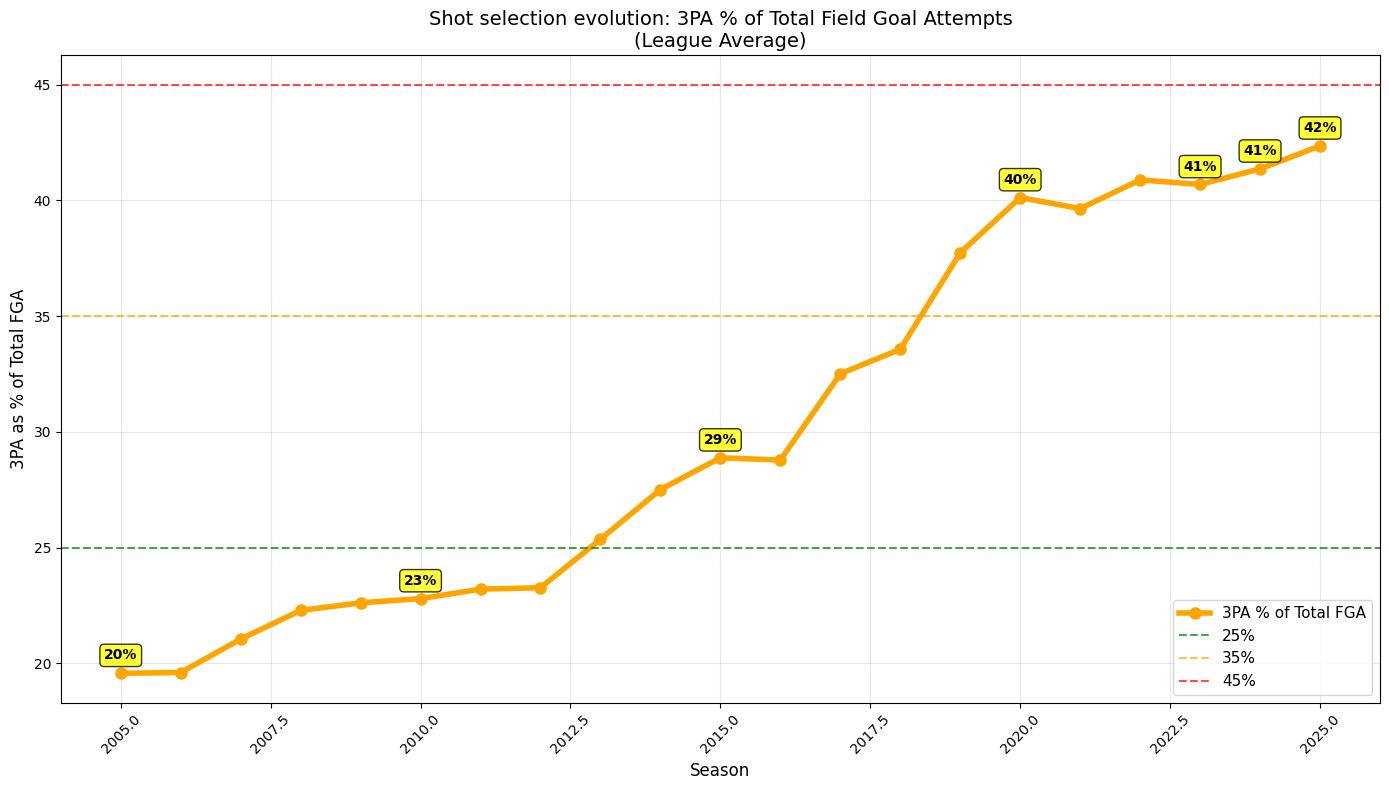

Total increase: +116%
Qualified players: 11,653 player-seasons


In [41]:


# Calculate 3PA as % of total FGA for each player
df_filtered['3PA_ratio'] = df_filtered['3PA'] / df_filtered['FGA']

# Group by season and calculate league average 3PA ratio
season_ratio = df_filtered.groupby('Season')['3PA_ratio'].mean().reset_index()
season_ratio['Season'] = pd.to_numeric(season_ratio['Season'], errors='coerce')
season_ratio = season_ratio.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_ratio['Season'], season_ratio['3PA_ratio'] * 100,
         marker='o', linewidth=4, label='3PA % of Total FGA', color='orange', markersize=8)

#reference lines
plt.axhline(y=25, color='green', linestyle='--', alpha=0.7, label='25%')
plt.axhline(y=35, color='orange', linestyle='--', alpha=0.7, label='35%')
plt.axhline(y=45, color='red', linestyle='--', alpha=0.7, label='45%')


plt.xlabel('Season', fontsize=12)
plt.ylabel('3PA as % of Total FGA', fontsize=12)
plt.title('Shot selection evolution: 3PA % of Total Field Goal Attempts\n(League Average)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels every 3 years + recent seasons
label_years = [2005, 2010, 2015, 2020, 2023, 2024, 2025]
for year in label_years:
    if year in season_ratio['Season'].values:
        idx = season_ratio[season_ratio['Season'] == year].index[0]
        plt.annotate(f'{season_ratio.loc[idx, "3PA_ratio"]*100:.0f}%',
                    xy=(year, season_ratio.loc[idx, '3PA_ratio']*100),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Print key stats for report

print(f"Total increase: +{((season_ratio['3PA_ratio'].iloc[-1]/season_ratio['3PA_ratio'].iloc[0]-1)*100):.0f}%")
print(f"Qualified players: {len(df_filtered):,} player-seasons")


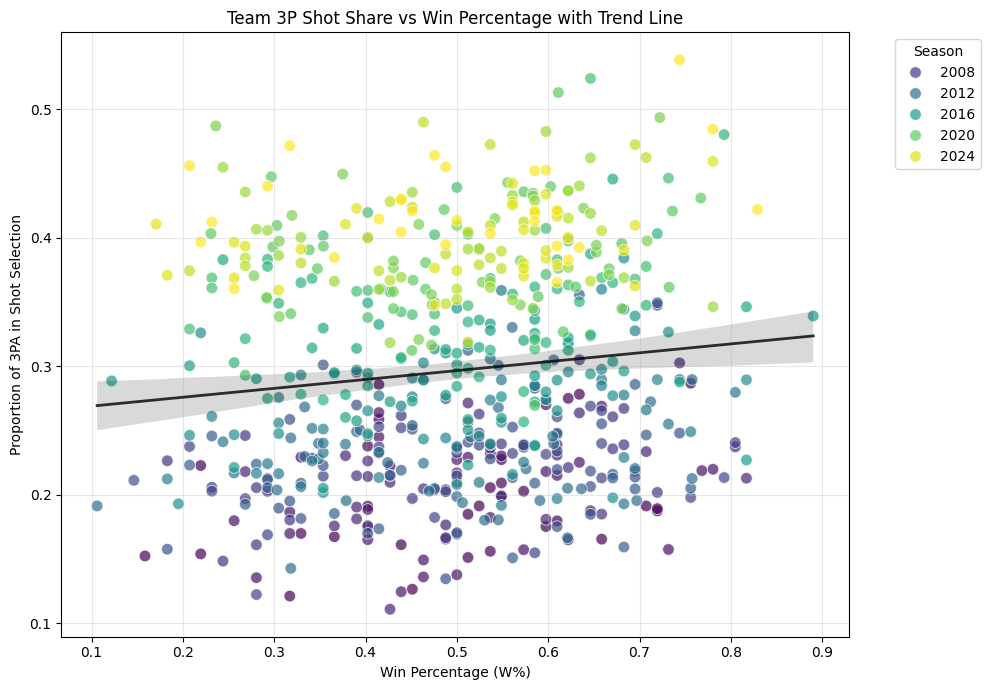

Correlation between W% and 3P shot share: 0.119
As expected from our previous analysis, 3P aren't more valuable than 2P explaining the lack of strong correlation with W%


In [42]:

#Scatterplot of Win% and 3PA as % to see if there's any correlation between the two
players = nbas_data_full
teams   = sts_data_full


team_shooting = (
    players
    .groupby(['Season', 'Team'])[['3PA', '2PA']]
    .mean()
    .reset_index()
)


team_shooting['3P_share'] = team_shooting['3PA'] / (team_shooting['3PA'] + team_shooting['2PA'])

#Merge W% and team shot selection
team_level = pd.merge(
    team_shooting,
    teams[['Team', 'Season', 'W%']],
    on=['Team', 'Season'],
    how='inner'
)

#Scatter with global trend line
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=team_level,
    x='W%',
    y='3P_share',
    hue='Season',
    palette='viridis',
    alpha=0.7,
    s=70
)


sns.regplot(
    data=team_level,
    x='W%',
    y='3P_share',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'alpha': 0.8}
)

plt.xlabel('Win Percentage (W%)')
plt.ylabel('Proportion of 3PA in Shot Selection')
plt.title('Team 3P Shot Share vs Win Percentage with Trend Line')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Season')
plt.tight_layout()
plt.show()

#Computing correlation between W% and 3P shot share
corr = team_level['W%'].corr(team_level['3P_share'])
print(f"Correlation between W% and 3P shot share: {corr:.3f}")
print("As expected from our previous analysis, 3P aren't more valuable than 2P explaining the lack of strong correlation with W%")

## **Which performance variables are strongly correlated to a good regular season record?**


In [55]:

#Filter out players with less than 5 minute played
nbas_df = nbas_data_full.copy()
nbas_df['MP'] = pd.to_numeric(nbas_df['MP'], errors='coerce')
nbas_df = nbas_df[nbas_df['MP'] >= 5]


stat_cols = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
             'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
             'BLK', 'TOV', 'PF', 'PTS']

for col in stat_cols:
    nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce')

#  normalize each stat (0–1)
for col in stat_cols:
    col_min = nbas_df[col].min()
    col_max = nbas_df[col].max()
    if col_max > col_min:
        nbas_df[f'{col}_norm'] = (nbas_df[col] - col_min) / (col_max - col_min)
    else:
        nbas_df[f'{col}_norm'] = 0.0

#Aggregate normalized stats by Team–Season (mean)
team_stats = (
    nbas_df
    .groupby(['Team', 'Season'])[[f'{c}_norm' for c in stat_cols]]
    .mean()
    .reset_index()
)


sts_df = sts_data_full.copy()
sts_df['W%'] = pd.to_numeric(sts_df['W%'], errors='coerce')

merged_df = team_stats.merge(
    sts_df[['Team', 'Season', 'W%']],
    on=['Team', 'Season'],
    how='inner'
)


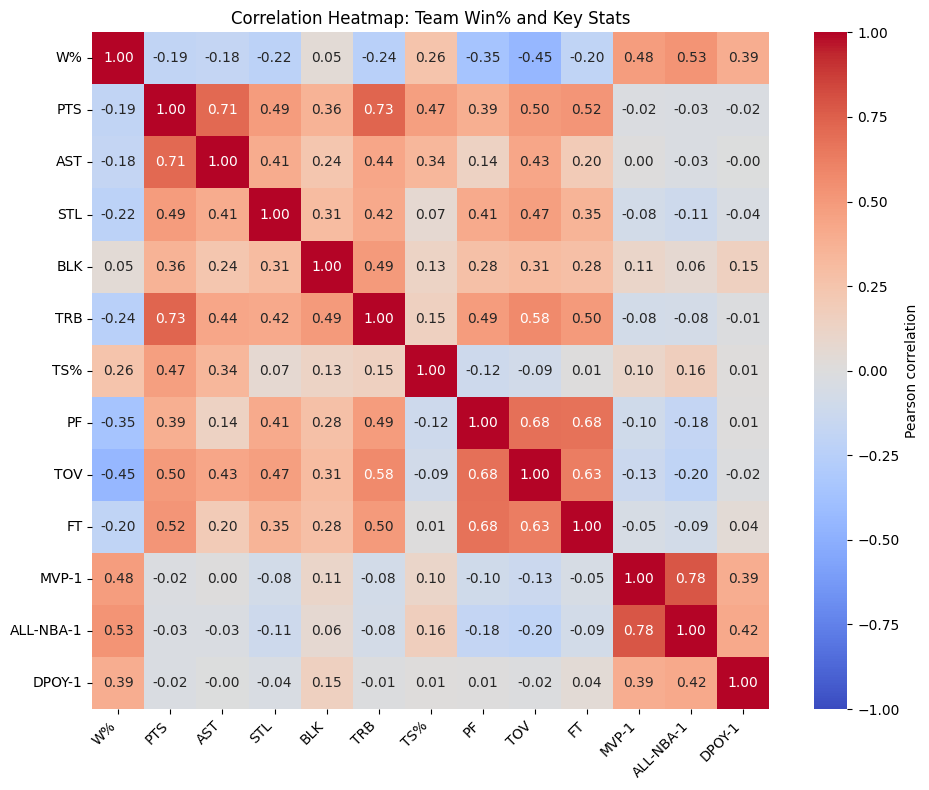

In [45]:
player_cols = ['Team', 'Season', 'PTS', 'AST', 'STL', 'BLK', 'TRB', 'TS%',
               'PF', 'TOV','FT', 'MVP-1', 'ALL-NBA-1','DPOY-1']
nbas=nbas_data_full[nbas_data_full['Season']!=2005]
tmp = nbas[player_cols].copy()

# Ensure numeric
num_cols = ['PTS', 'AST', 'STL', 'BLK', 'TRB', 'TS%', 'PF', 'TOV','FT', 'MVP-1', 'ALL-NBA-1','DPOY-1']
for c in num_cols:
    tmp[c] = pd.to_numeric(tmp[c], errors='coerce')

# Aggregate by team-season (mean for continuous, max for dummies also works)
team_stats = (
    tmp
    .groupby(['Team', 'Season'])
    .agg({
        'PTS': 'mean',
        'AST': 'mean',
        'STL': 'mean',
        'BLK': 'mean',
        'TRB': 'mean',
        'TS%': 'mean',
        'PF': 'mean',
        'TOV': 'mean',
        'FT': 'mean',
        'MVP-1': 'max',
        'ALL-NBA-1': 'max',
        'DPOY-1': 'max'
    })
    .reset_index()
)

# Add team W%
sts_tmp = sts_df[['Team', 'Season', 'W%']].copy()
sts_tmp['W%'] = pd.to_numeric(sts_tmp['W%'], errors='coerce')

merged = team_stats.merge(sts_tmp, on=['Team', 'Season'], how='inner')

# --- 2. Correlation matrix for requested variables ---

corr_vars = ['W%', 'PTS', 'AST', 'STL', 'BLK', 'TRB', 'TS%', 'PF', 'TOV','FT', 'MVP-1', 'ALL-NBA-1','DPOY-1']
corr_df = merged[corr_vars].corr(method='pearson')

# --- 3. Heatmap ---

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={'label': 'Pearson correlation'}
)
plt.title('Correlation Heatmap: Team Win% and Key Stats')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## **Is offense more important than defense ?**


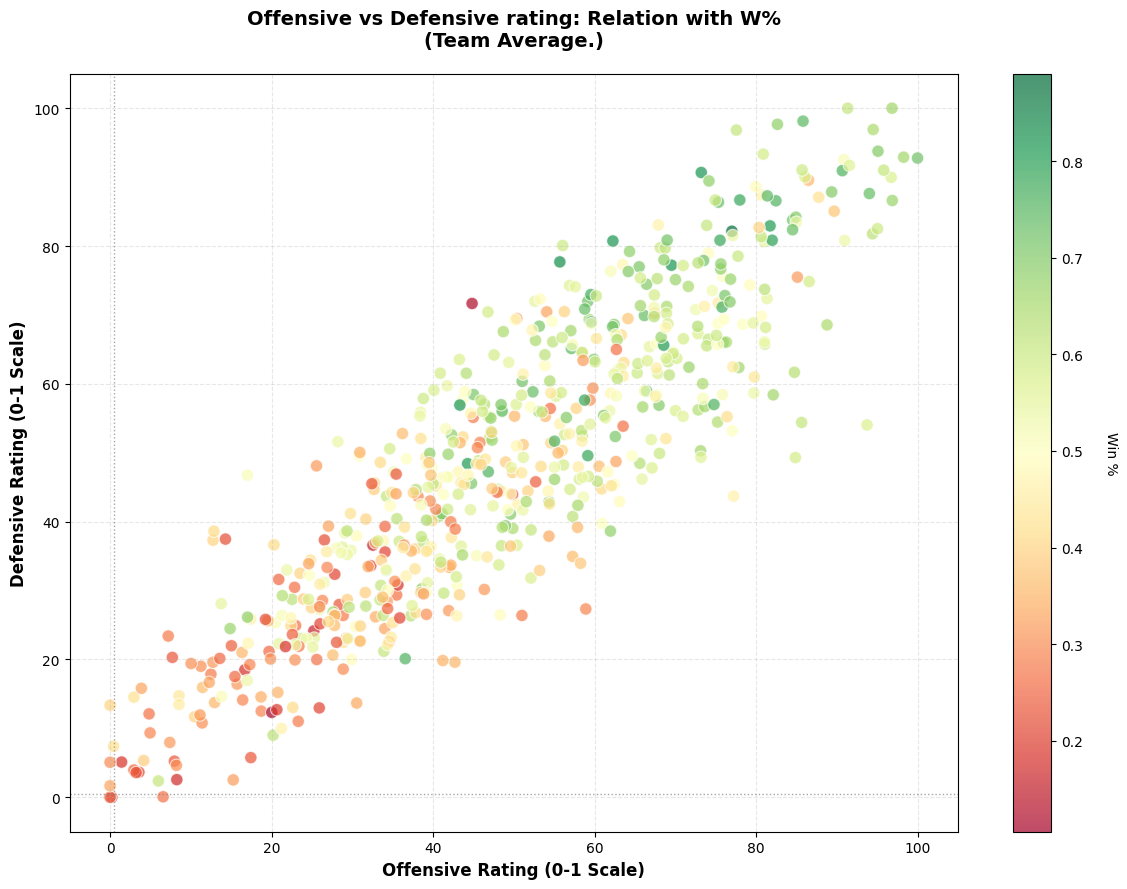

Correlations with Win % (using normalized individual stats):
Offense: 0.548
Defense: 0.571


In [49]:
# To evaluate the impact of defense and offense we create a defensive and offensive rating.
# Normalize stats per 82 games to not be skewed by player mean stats in case of low game play
#filter low-minute players as their impact on a game is low they mostly play once the outcome is already decided
norm_data = nbas_data_full.copy()
norm_data['MP_norm'] = (norm_data['MP'] * norm_data['G']) / 82
norm_data = norm_data[norm_data['MP_norm'] >= 3].copy()

#Classify stat as offensive or defensive
off_stats = ['PTS', 'AST', 'ORB','FT','TS%']
def_stats = ['STL', 'BLK', 'DRB']

for stat in off_stats + def_stats:
    norm_data[f'{stat}_norm'] = (norm_data[stat] * norm_data['G']) / 82

# Aggregate to team level
team_stats = norm_data.groupby(['Season', 'Team']).agg({
    'PTS_norm': 'mean', 'AST_norm': 'mean', 'ORB_norm': 'mean',
    'STL_norm': 'mean', 'BLK_norm': 'mean', 'DRB_norm': 'mean',
    'FT_norm': 'mean', 'TS%_norm': 'mean'
}).reset_index()

# Normalize stats to 0-1 before computing ratings to not skew the offensive rating by different order of magnitude
for stat in ['PTS_norm', 'AST_norm', 'ORB_norm','FT_norm','TS%_norm']:
    team_stats[f'{stat}_scaled'] = team_stats.groupby('Season')[stat].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))

for stat in ['STL_norm', 'BLK_norm', 'DRB_norm']:
    team_stats[f'{stat}_scaled'] = team_stats.groupby('Season')[stat].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))

# Compute ratings from scaled stat and multiply by 100 for readability
team_stats['Off_Rating_norm'] = (
    team_stats['PTS_norm_scaled'] +
    team_stats['AST_norm_scaled'] +
    team_stats['ORB_norm_scaled'] +
    team_stats['FT_norm_scaled'] +
    team_stats['TS%_norm_scaled']

) / 5*100

team_stats['Def_Rating_norm'] = (
    team_stats['STL_norm_scaled'] +
    team_stats['BLK_norm_scaled'] +
    team_stats['DRB_norm_scaled']
) / 3*100

# Merge with win percentages
df_plot = pd.merge(team_stats[['Season', 'Team', 'Off_Rating_norm', 'Def_Rating_norm']],
                   sts_data_full[['Team', 'Season', 'W%']],
                   on=['Team', 'Season'])


# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 9))

scatter = ax.scatter(df_plot['Off_Rating_norm'], df_plot['Def_Rating_norm'],
                     c=df_plot['W%'],
                     cmap='RdYlGn',
                     s=80, alpha=0.7, edgecolor='white', linewidth=0.8)


cbar = plt.colorbar(scatter, ax=ax, label='Win Percentage')
cbar.set_label('Win %', rotation=270, labelpad=25)

ax.set_xlabel('Offensive Rating (0-1 Scale)', fontsize=12, fontweight='bold')
ax.set_ylabel('Defensive Rating (0-1 Scale)', fontsize=12, fontweight='bold')
ax.set_title('Offensive vs Defensive rating: Relation with W%\n(Team Average.)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

# Quadrant lines
ax.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)
ax.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)

plt.tight_layout()
plt.show()

# Correlation summary
print("Correlations with Win % (using normalized individual stats):")
print(f"Offense: {df_plot['Off_Rating_norm'].corr(df_plot['W%']):.3f}")
print(f"Defense: {df_plot['Def_Rating_norm'].corr(df_plot['W%']):.3f}")

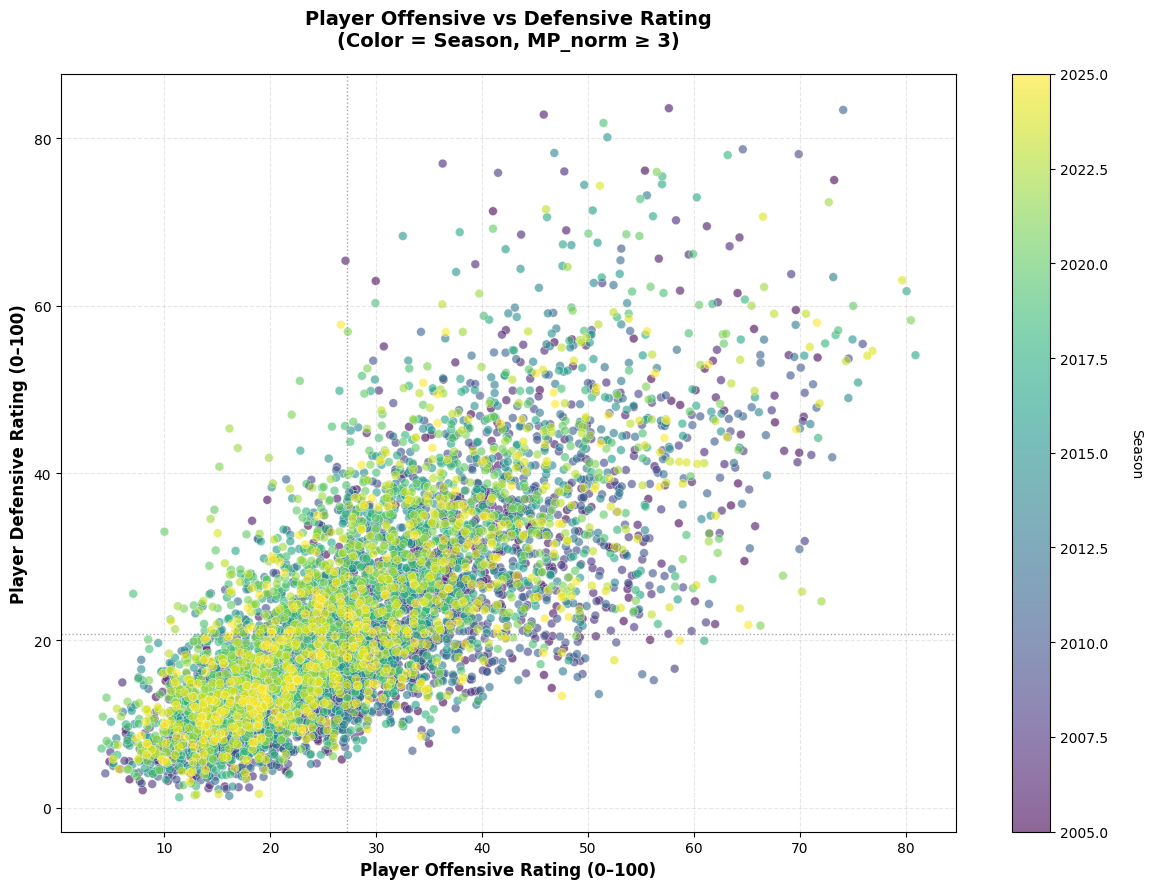

In [50]:
player_norm = nbas_data_full.copy()

player_norm['MP'] = pd.to_numeric(player_norm['MP'], errors='coerce')
player_norm['G']  = pd.to_numeric(player_norm['G'],  errors='coerce')

# Filter low-minute players (MP_norm >= 3)
player_norm['MP_norm'] = (player_norm['MP'] * player_norm['G']) / 82
player_norm = player_norm[player_norm['MP_norm'] >= 10].copy()

# Offensive / defensive stats
off_stats = ['PTS', 'AST', 'ORB', 'FT', 'TS%']
def_stats = ['STL', 'BLK', 'DRB']

for stat in off_stats + def_stats:
    player_norm[stat] = pd.to_numeric(player_norm[stat], errors='coerce')
    player_norm[f'{stat}_norm'] = (player_norm[stat] * player_norm['G']) / 82

# 2. Aggregate to player-season level
player_stats = (
    player_norm
    .groupby(['Season', 'Player'])[
        [f'{s}_norm' for s in off_stats + def_stats]
    ]
    .mean()
    .reset_index()
)

# 3. Season-wise 0–1 scaling of each normalized stat
for stat in [f'{s}_norm' for s in off_stats]:
    player_stats[f'{stat}_scaled'] = (
        player_stats
        .groupby('Season')[stat]
        .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
    )

for stat in [f'{s}_norm' for s in def_stats]:
    player_stats[f'{stat}_scaled'] = (
        player_stats
        .groupby('Season')[stat]
        .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
    )

# 4. Compute offensive / defensive ratings (0–100 scale)
player_stats['Off_Rating_norm'] = (
    player_stats['PTS_norm_scaled'] +
    player_stats['AST_norm_scaled'] +
    player_stats['ORB_norm_scaled'] +
    player_stats['FT_norm_scaled']  +
    player_stats['TS%_norm_scaled']
) / 5 * 100

player_stats['Def_Rating_norm'] = (
    player_stats['STL_norm_scaled'] +
    player_stats['BLK_norm_scaled'] +
    player_stats['DRB_norm_scaled']
) / 3 * 100

# 5. Scatter plot: x = Off_Rating_norm, y = Def_Rating_norm, color = Season
fig, ax = plt.subplots(figsize=(12, 9))

scatter = ax.scatter(
    player_stats['Off_Rating_norm'],
    player_stats['Def_Rating_norm'],
    c=player_stats['Season'],
    cmap='viridis',
    s=40,
    alpha=0.6,
    edgecolor='white',
    linewidth=0.4
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Season', rotation=270, labelpad=25)

ax.set_xlabel('Player Offensive Rating (0–100)', fontsize=12, fontweight='bold')
ax.set_ylabel('Player Defensive Rating (0–100)', fontsize=12, fontweight='bold')
ax.set_title('Player Offensive vs Defensive Rating\n(Color = Season, MP_norm ≥ 3)',
             fontsize=14, fontweight='bold', pad=20)

ax.grid(True, alpha=0.3, linestyle='--')

# Optional quadrant lines at median
ax.axvline(player_stats['Off_Rating_norm'].median(),
           color='gray', linestyle=':', alpha=0.7, linewidth=1)
ax.axhline(player_stats['Def_Rating_norm'].median(),
           color='gray', linestyle=':', alpha=0.7, linewidth=1)

plt.tight_layout()
plt.show()

In [51]:
# Display top 10 teams by Win % with their off and deff ratings
top_10_winners = df_plot.nlargest(10, 'W%')[['Season', 'Team', 'W%', 'Off_Rating_norm', 'Def_Rating_norm']].copy()
top_10_winners = top_10_winners.round({'W%': 3, 'Off_Rating_norm': 3, 'Def_Rating_norm': 3})

print("Top 10 Teams by Win Percentage:")
print(top_10_winners.to_string(index=False))

# Pretty table with tabulate
print("\nFormatted Table:")
print(tbl.tabulate(top_10_winners, headers='keys', tablefmt='grid', showindex=False))

#print the quantile to be used for the report
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
off_quantiles = df_plot['Off_Rating_norm'].quantile(quantiles)
def_quantiles = df_plot['Def_Rating_norm'].quantile(quantiles)

print("\nQuantile Summary:")
print(pd.DataFrame({
    'Offense': off_quantiles.round(3),
    'Defense': def_quantiles.round(3)
}))

Top 10 Teams by Win Percentage:
 Season Team    W%  Off_Rating_norm  Def_Rating_norm
   2016  GSW 0.890           77.010           82.148
   2025  OKC 0.829           55.698           77.697
   2007  DAL 0.817           69.524           77.221
   2015  GSW 0.817           73.217           90.672
   2016  SAS 0.817           43.320           56.922
   2017  GSW 0.817           62.272           80.731
   2008  BOS 0.805           68.565           65.611
   2009  CLE 0.805           44.278           48.421
   2013  MIA 0.805           81.737           82.925
   2009  LAL 0.793           82.001           80.840

Formatted Table:
+----------+--------+-------+-------------------+-------------------+
|   Season | Team   |    W% |   Off_Rating_norm |   Def_Rating_norm |
+==========+========+=======+===================+===================+
|     2016 | GSW    | 0.89  |            77.01  |            82.148 |
+----------+--------+-------+-------------------+-------------------+
|     2025 | OKC 

## **What makes a player truly valuable to a team ?**

/tmp/ipython-input-3019844158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbas[col] = pd.to_numeric(nbas[col], errors='coerce')
/tmp/ipython-input-3019844158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbas['TS%'] = nbas['PTS'] / (2 * (nbas['FGA'] + 0.44 * nbas['FTA'] + 1e-7))


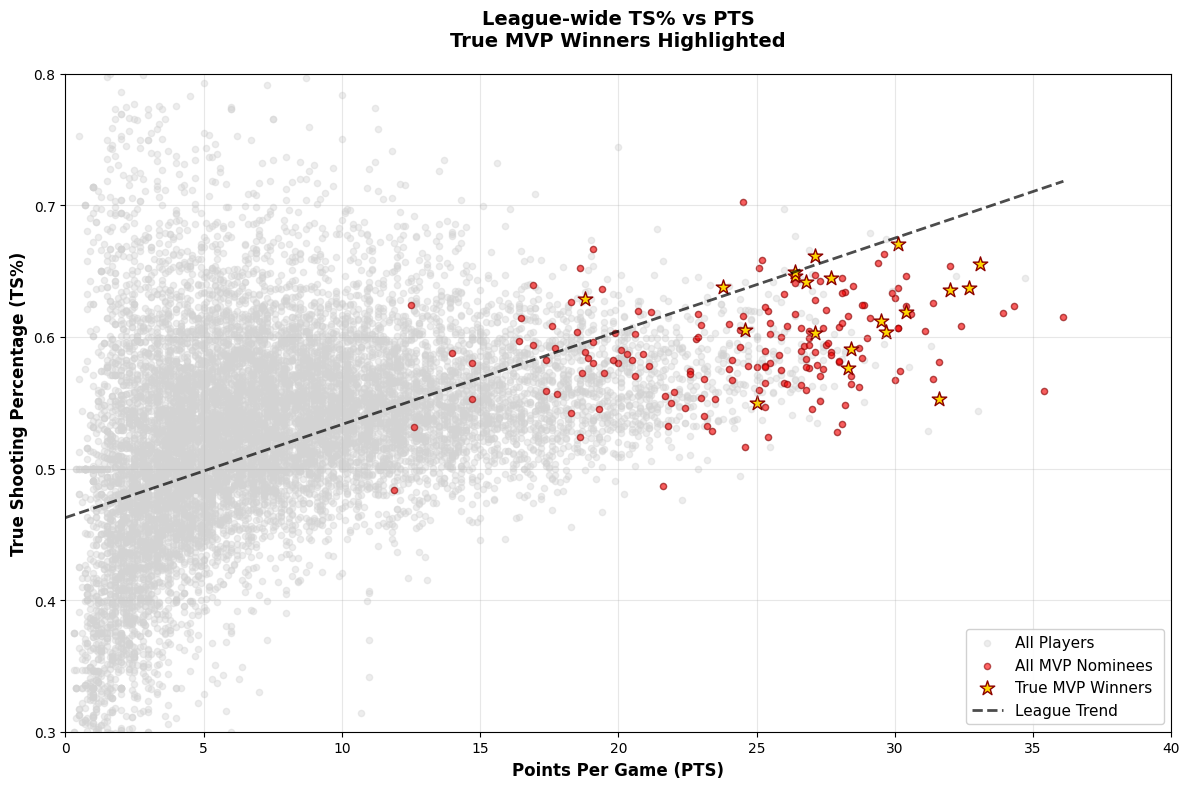

Total league player-seasons plotted: 12727
True MVP-1 winners highlighted: 20


In [52]:
for col in ['PTS', 'FGA', 'FTA']:
    nbas[col] = pd.to_numeric(nbas[col], errors='coerce')

# Calculate TS% = PTS / (2 * (FGA + 0.44 * FTA))
nbas['TS%'] = nbas['PTS'] / (2 * (nbas['FGA'] + 0.44 * nbas['FTA'] + 1e-7))

# --- True MVP selection (same logic as before) ---

# Start from MVP seasons
mvp_players = nbas[nbas['MVP'] == 1].copy()

# Exclude MVP-10 to MVP-17 so they aren't counted as True MVP
exclude_awards = ['MVP-10', 'MVP-11', 'MVP-12', 'MVP-13', 'MVP-14', 'MVP-15','MVP-16','MVP-17']
mvp_players['exclude_mvp'] = mvp_players['Awards'].str.contains('|'.join(exclude_awards), na=False)
mvp_players = mvp_players[~mvp_players['exclude_mvp']]

# Flag true MVP winners
mvp_players['mvp_award_1'] = mvp_players['Awards'].str.contains('MVP-1', na=False)
mvp_players['mvp_award'] = mvp_players['Awards'].str.contains('MVP', na=False)

all_mvp= mvp_players[mvp_players['mvp_award'] == True]
true_mvp = mvp_players[mvp_players['mvp_award_1'] == True]

# Keep only rows with valid PTS & TS%
league = nbas.dropna(subset=['PTS', 'TS%'])
true_mvp = true_mvp.dropna(subset=['PTS', 'TS%'])
all_mvp = all_mvp.dropna(subset=['PTS', 'TS%'])
# --- Plot whole league + highlight true MVPs ---

plt.figure(figsize=(12, 8))

# Regular player light grey circles
plt.scatter(
    league['PTS'], league['TS%'],
    c='lightgrey', alpha=0.4, s=20,
    label='All Players'
)
plt.scatter(
    all_mvp['PTS'], all_mvp['TS%'],
    c='red', alpha=0.6, s=20,
    edgecolors='darkred', linewidth=1,
    label='All MVP Nominees '
)
#MVP as gold stars
plt.scatter(
    true_mvp['PTS'], true_mvp['TS%'],
    c='gold', alpha=1, s=120, marker='*',
    edgecolors='darkred', linewidth=1,
    label='True MVP Winners'
)

# trend line for entire league
z_all = np.polyfit(league['PTS'], league['TS%'], 1)
p_all = np.poly1d(z_all)
x_sorted = np.linspace(league['PTS'].min(), league['PTS'].max(), 200)
plt.plot(x_sorted, p_all(x_sorted), 'k--', alpha=0.7, linewidth=2, label='League Trend')

# Formatting
plt.xlabel('Points Per Game (PTS)', fontsize=12, fontweight='bold')
plt.ylabel('True Shooting Percentage (TS%)', fontsize=12, fontweight='bold')
plt.title('League-wide TS% vs PTS\nTrue MVP Winners Highlighted', fontsize=14, fontweight='bold', pad=20)
plt.xlim(0, max(40, league['PTS'].max()))
plt.ylim(0.3, 0.8)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right', fontsize=11, framealpha=0.9)
plt.tight_layout()

plt.show()

print(f"Total league player-seasons plotted: {len(league)}")
print(f"True MVP-1 winners highlighted: {len(true_mvp)}")

/tmp/ipython-input-261329110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbas[col] = pd.to_numeric(nbas[col], errors='coerce')
/tmp/ipython-input-261329110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbas['TS%'] = nbas['PTS'] / (2 * (nbas['FGA'] + 0.44 * nbas['FTA'] + 1e-7))


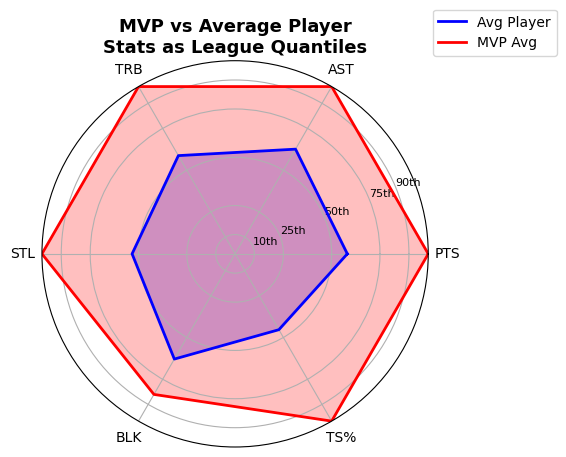

In [53]:
for col in ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'FGA', 'FTA', 'MP']:
    nbas[col] = pd.to_numeric(nbas[col], errors='coerce')

nbas['TS%'] = nbas['PTS'] / (2 * (nbas['FGA'] + 0.44 * nbas['FTA'] + 1e-7))

stats_cols = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TS%']

# Filter out low minute player
league = nbas[nbas['MP'] >= 5].dropna(subset=stats_cols)

# MVP Winner
mvp = league[league['MVP'] == 1].copy()
exclude = ['MVP-10', 'MVP-11', 'MVP-12', 'MVP-13', 'MVP-14', 'MVP-15']
mvp['exclude_mvp'] = mvp['Awards'].str.contains('|'.join(exclude), na=False)
mvp = mvp[~mvp['exclude_mvp']]
mvp['mvp_award_1'] = mvp['Awards'].str.contains('MVP-1', na=False)
true_mvp = mvp[mvp['mvp_award_1']].dropna(subset=stats_cols)

mvp_mean = true_mvp[stats_cols].mean()
league_mean = league[stats_cols].mean()

# ---------- Quantile mapping for MP>=5 league ----------
q_levels = [0.1, 0.25, 0.5, 0.75, 0.9]
q = league[stats_cols].quantile(q_levels).T  # rows: stats, cols: quantiles

def value_to_quantile(stat_name, value, q_row):
    qs = q_levels
    vs = q_row.values

    if value <= vs[0]:
        return 0.0
    if value >= vs[-1]:
        return 1.0

    for i in range(len(qs) - 1):
        if vs[i] <= value <= vs[i+1]:
            frac = (value - vs[i]) / (vs[i+1] - vs[i] + 1e-9)
            return qs[i] + frac * (qs[i+1] - qs[i])
    return 0.5

def profile_to_quantiles(mean_series):
    vals = []
    for stat in stats_cols:
        vals.append(value_to_quantile(stat, mean_series[stat], q.loc[stat]))
    return np.array(vals)

mvp_quant = profile_to_quantiles(mvp_mean)
lg_quant  = profile_to_quantiles(league_mean)

# ---------- Radar ----------
def make_radar(ax, values, label, color, stat_names):
    N = len(stat_names)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    vals = values.tolist()
    vals += vals[:1]

    ax.plot(angles, vals, color=color, linewidth=2, label=label)
    ax.fill(angles, vals, color=color, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stat_names, fontsize=10)

    ax.set_ylim(0, 1.0)
    ax.set_yticks([0.1, 0.25, 0.5, 0.75, 0.9])
    ax.set_yticklabels(['10th', '25th', '50th', '75th', '90th'], fontsize=8)

# ---------- Combined radar: True MVP vs Avg Player ----------
plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, polar=True)

make_radar(ax, lg_quant,  'Avg Player', 'blue', stats_cols)
make_radar(ax, mvp_quant, 'MVP Avg',      'red',      stats_cols)

ax.set_title(
    'MVP vs Average Player\nStats as League Quantiles',
    fontsize=13,
    fontweight='bold'
)
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15))

plt.tight_layout()
plt.show()

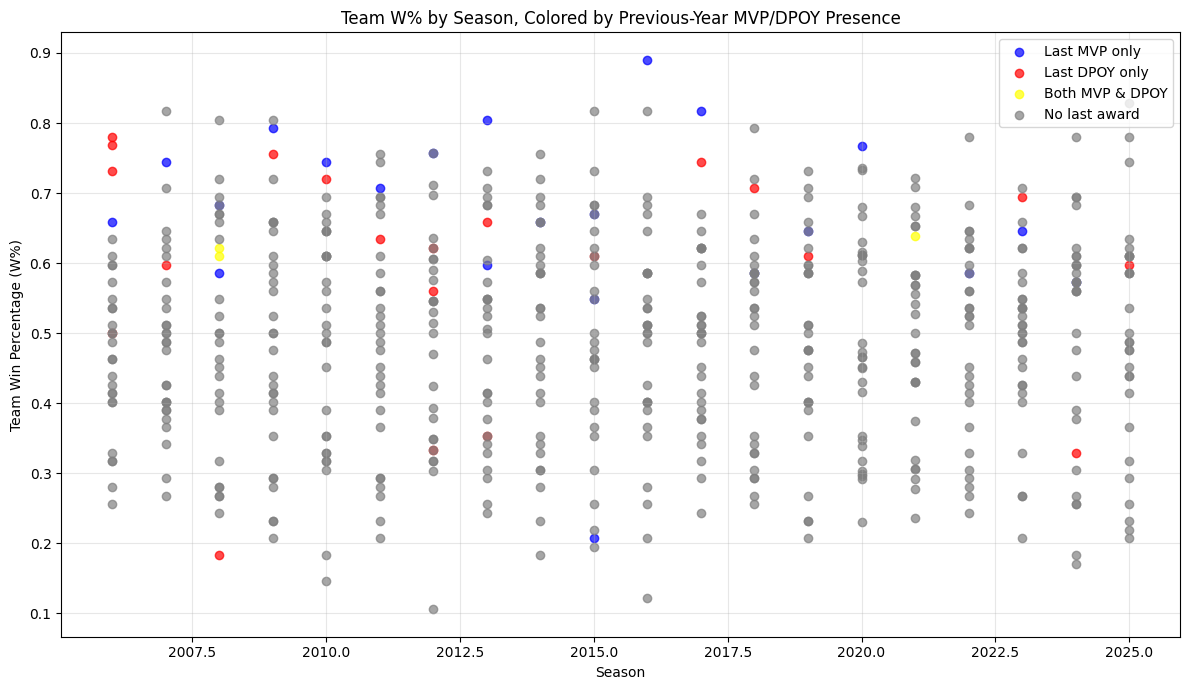

In [54]:

# 1) Build team-season award flags (1 if ANY player on team has TMVP-1 / TDPOY-1)
df_aw = nbas_data_full.copy()
df_aw['TMVP-1'] = pd.to_numeric(df_aw['TMVP-1'], errors='coerce').fillna(0).astype(int)
df_aw['TDPOY-1'] = pd.to_numeric(df_aw['TDPOY-1'], errors='coerce').fillna(0).astype(int)

team_awards = (
    df_aw.groupby(['Team', 'Season'])[['TMVP-1', 'TDPOY-1']]
        .max()
        .reset_index()
)

# 2) Merge with team W%
df_sts = sts_data_full.copy()
df_sts['W%'] = pd.to_numeric(df_sts['W%'], errors='coerce')
merged = df_sts.merge(team_awards, on=['Team', 'Season'], how='left')
merged[['TMVP-1', 'TDPOY-1']] = merged[['TMVP-1', 'TDPOY-1']].fillna(0).astype(int)

# Exclude 2005
merged = merged[merged['Season'] != 2005]

# 3) Assign colors
def team_color(row):
    if row['TMVP-1'] == 1 and row['TDPOY-1'] == 1:
        return 'yellow'   # both
    elif row['TMVP-1'] == 1:
        return 'blue'     # last MVP only
    elif row['TDPOY-1'] == 1:
        return 'red'      # last DPOY only
    else:
        return 'gray'     # others

merged['color'] = merged.apply(team_color, axis=1)

# 4) Plot: Season (x), W% (y), one point per team-season
plt.figure(figsize=(12, 7))

for color, label in [('blue','Last MVP only'),
                     ('red','Last DPOY only'),
                     ('yellow','Both MVP & DPOY'),
                     ('gray','No last award')]:
    sub = merged[merged['color'] == color]
    if not sub.empty:
        plt.scatter(sub['Season'], sub['W%'], c=color, label=label, alpha=0.7)

plt.xlabel('Season')
plt.ylabel('Team Win Percentage (W%)')
plt.title('Team W% by Season, Colored by Previous-Year MVP/DPOY Presence')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
